In [46]:
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
from sklearn import datasets
from keras.optimizers import Adam
from keras.utils import np_utils
import numpy as np
import argparse
import cv2
 
# load the MNIST digits dataset
mnist = fetch_mldata('MNIST original')

# reshape the MNIST dataset from 784-dim vectors to 28 x 28 pixel images 
data = mnist.data.reshape((mnist.data.shape[0], 28, 28))

# construct the training and testing splits and scale the data to the range [0, 1.0]
(trainData, testData, trainLabels, testLabels) = train_test_split(data / 255.0, mnist.target.astype("int"), test_size=0.7)

trainData = trainData.reshape(trainData.shape[0], 28, 28, 1)

testD = testData[0:750]

testData = testData.reshape(testData.shape[0], 28, 28, 1)
testData = testData[:750]
testLabels = testLabels[:750]

trainL = trainLabels
testL = testLabels

trainLabels = np_utils.to_categorical(trainLabels, 10)
testLabels = np_utils.to_categorical(testLabels, 10)

In [2]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D,MaxPooling2D
from keras.layers.core import Activation,Dropout,Flatten,Dense
     
model = Sequential()
# first set of CONV => RELU => POOL

model.add(Convolution2D(32, (5, 5),input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# second set of CONV => RELU => POOL
model.add(Convolution2D(50,(5, 5),input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
              
# set of FC => RELU layers
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))
model.add(Dropout(0.2))

# softmax classifier
model.add(Dense(10))
model.add(Activation("softmax"))
        

In [3]:
# initialize the optimizer and model
print("Compiling model...")

model.compile(loss="categorical_crossentropy", optimizer=Adam(),metrics=["accuracy"])

# only train and evaluate the model if we *are not* loading a
# pre-existing model
print("training...")
#print(trainData.shape)

model.fit(trainData, trainLabels, batch_size=128, epochs=10, validation_data=(testData, testLabels))

Compiling model...
training...
Train on 21000 samples, validate on 750 samples
Epoch 1/10
21000/21000 [==============================] - 34s - loss: 0.3508 - acc: 0.8943 - val_loss: 0.1047 - val_acc: 0.9693
Epoch 2/10
21000/21000 [==============================] - 33s - loss: 0.0896 - acc: 0.9732 - val_loss: 0.0660 - val_acc: 0.9800
Epoch 3/10
21000/21000 [==============================] - 36s - loss: 0.0536 - acc: 0.9833 - val_loss: 0.0591 - val_acc: 0.9840
Epoch 4/10
21000/21000 [==============================] - 38s - loss: 0.0429 - acc: 0.9868 - val_loss: 0.0641 - val_acc: 0.9800
Epoch 5/10
21000/21000 [==============================] - 36s - loss: 0.0349 - acc: 0.9889 - val_loss: 0.0429 - val_acc: 0.9867
Epoch 6/10
21000/21000 [==============================] - 36s - loss: 0.0242 - acc: 0.9921 - val_loss: 0.0444 - val_acc: 0.9853
Epoch 7/10
21000/21000 [==============================] - 35s - loss: 0.0186 - acc: 0.9944 - val_loss: 0.0463 - val_acc: 0.9853
Epoch 8/10
21000/21000 [=

In [50]:
 # show the accuracy on the testing set
print("evaluating...")
(loss, accuracy) = model.evaluate(testData, testLabels,batch_size=128, verbose=1)
print("accuracy: {:.2f}%".format(accuracy * 100))

evaluating...
750/750 [==============================] - 2s     
accuracy: 99.33%


In [56]:
y_train_pred = np.array([], dtype=np.float64)

for i in range(0,len(trainL)):
    probs = model.predict(trainData[np.newaxis, i])
    prediction = probs.argmax(axis=1)
    y_train_pred=np.append(y_train_pred,int(prediction))
accuracy = \
  ((np.sum(trainL == y_train_pred, axis=0)).astype('float') / trainData.shape[0])
    
accuracy

0.99119047619047618

In [57]:
y_test_pred = np.array([], dtype=np.float64)

for i in range(0,len(testL)):
    probs = model.predict(testData[np.newaxis, i])
    prediction = probs.argmax(axis=1)
    y_test_pred=np.append(y_test_pred,int(prediction))
accuracy = \
  ((np.sum(testL == y_test_pred, axis=0)).astype('float') / testData.shape[0])
    
accuracy

0.99333333333333329

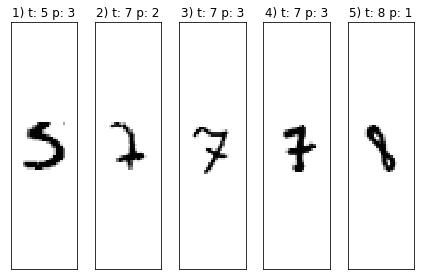

In [59]:
import matplotlib.pyplot as plt

misclassified_img = testD[testL != y_test_pred][:30]
correct_lab = testL[testL != y_test_pred][:30]
misclassified_lab = y_test_pred[testL != y_test_pred][:30]
rows = len(misclassified_img)//5
fig, ax = plt.subplots(nrows=rows, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(len(misclassified_img)):
    img = misclassified_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], misclassified_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

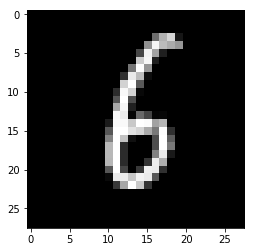

Predicted: 6, Actual: 6



In [ ]:
from matplotlib import pyplot as plt
import imutils

# randomly select a few testing digits
for i in np.random.choice(np.arange(0, len(testLabels)), size=(10,)):
	# classify the digit

	plt.imshow(np.squeeze(testData[i]),cmap=plt.get_cmap('gray'))
	plt.show()

	probs = model.predict(testData[np.newaxis, i])
	prediction = probs.argmax(axis=1)
 
	image = np.squeeze(testData[i])
	image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)
	image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)

	cv2.putText(image,str(prediction[0]), (2,25), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2)
 
	# show the image and prediction
	print("Predicted: {}, Actual: {}".format(prediction[0],
		np.argmax(testLabels[i])))
	print()
	cv2.imshow("Digit", image)
	cv2.waitKey(0)

In [ ]:
from scipy import ndimage
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

# read the image
gray = cv2.imread("sample_dig.png", 0)

# rescale it
gray = cv2.resize(255-gray, (28, 28))
# better black and white version
(thresh, gray) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

while np.sum(gray[0]) == 0:
    gray = gray[1:]

while np.sum(gray[:,0]) == 0:
    gray = np.delete(gray,0,1)

while np.sum(gray[-1]) == 0:
    gray = gray[:-1]

while np.sum(gray[:,-1]) == 0:
    gray = np.delete(gray,-1,1)

rows,cols = gray.shape

if rows > cols:
    factor = 20.0/rows
    rows = 20
    cols = int(round(cols*factor))
    # first cols than rows
    gray = cv2.resize(gray, (cols,rows))
else:
    factor = 20.0/cols
    cols = 20
    rows = int(round(rows*factor))
    # first cols than rows
    gray = cv2.resize(gray, (cols, rows))

colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')

shiftx,shifty = getBestShift(gray)
shifted = shift(gray,shiftx,shifty)
gray = shifted

# save the processed images
cv2.imwrite("newdig.png", gray) 
    
(thresh, gray) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
gray = cv2.resize(gray, (28, 28))
img = gray.flatten()

prediction = model.predict(img)

image = img.reshape((28, 28)).astype("uint8")
image = exposure.rescale_intensity(image, out_range=(0, 255))
image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)

#print(img.shape)

plt.imshow(np.squeeze(image),cmap=plt.get_cmap('gray'))
plt.show()
 
# show the prediction
print("I think that digit is: {}".format(prediction))
#cv2.imshow("Image", image)
#cv2.waitKey(0)